### 讀入基本套件 ###

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

/home/mingkai/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/mingkai/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/mingkai/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/mingkai/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:5

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.datasets import mnist, fashion_mnist
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils import to_categorical

### 進行資料預處理 ###

In [3]:
(x_train, y_train0), (x_test, y_test0) = mnist.load_data()

In [4]:
x_train = x_train/x_train.max()
x_test = x_test/x_test.max()

y_train = to_categorical(y_train0, 10)
y_test = to_categorical(y_test0, 10)

(-0.5, 27.5, 27.5, -0.5)

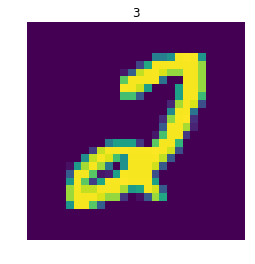

In [5]:
name_list = ['1', '2', '3', '4', '5', '6', '7', '8', '9', "10"]
idx = np.random.randint(x_train.shape[0])
x_sample = x_train[idx]
y_sample = y_train0[idx].squeeze()

plt.imshow(x_sample)
plt.title(name_list[y_sample])
plt.axis('off')

In [6]:
x_train.shape

(60000, 28, 28)

### 建構基本模型，並且更改其內部的一些參數 ###

In [7]:
CNN_layer = [Conv2D(16, (3,3), input_shape = (28, 28, 1), padding = 'same', activation = 'relu', name='Conv_1'),
            MaxPool2D(),
            Conv2D(64, (3,3), padding = 'same', activation = 'relu', name='Conv_2'),
            MaxPool2D(),
            Conv2D(256, (3,3), padding = 'same', activation = 'relu', name = 'Conv_3'),
            MaxPool2D(),
            GlobalAveragePooling2D()]
FC_layer = [Dense(128, activation = 'relu'),
             Dense(10, activation = 'softmax')]

In [8]:
model = Sequential(CNN_layer + FC_layer)

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 14, 14, 64)        9280      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
Conv_3 (Conv2D)              (None, 7, 7, 256)         147712    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 256)         0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 256)               0         
__________

In [10]:
model.compile(loss='categorical_crossentropy', 
                optimizer=Adam(),
                metrics=['categorical_accuracy'])


In [11]:
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)

In [12]:
model.fit(x_train, y_train, batch_size = 100, epochs = 10, validation_data = (x_test, y_test), shuffle = True)

Train on 60000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 29s 476us/sample - loss: 0.4680 - categorical_accuracy: 0.8535 - val_loss: 0.1489 - val_categorical_accuracy: 0.9547
Epoch 2/10
60000/60000 [==============================] - 27s 450us/sample - loss: 0.1246 - categorical_accuracy: 0.9616 - val_loss: 0.0750 - val_categorical_accuracy: 0.9772
Epoch 3/10
60000/60000 [==============================] - 26s 435us/sample - loss: 0.0868 - categorical_accuracy: 0.9736 - val_loss: 0.0588 - val_categorical_accuracy: 0.9819
Epoch 4/10
60000/60000 [==============================] - 30s 492us/sample - loss: 0.0684 - categorical_accuracy: 0.9787 - val_loss: 0.0560 - val_categorical_accuracy: 0.9823
Epoch 5/10
60000/60000 [==============================] - 32s 538us/sample - loss: 0.0511 - categorical_accuracy: 0.9843 - val_loss: 0.0577 - val_categorical_accuracy: 0.9811
Epoch 6/10
60000/60000 [===

In [13]:
score_train = model.evaluate(x_train, y_train)
score_test = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 149us/sample - loss: 0.0352 - categorical_accuracy: 0.9894


In [14]:
print(f'train_score:{score_train[1]}')
print(f'test_score:{score_test[1]}')

train_score:0.9913833141326904
test_score:0.9894000291824341


### 選擇不同的遷移目標 ###

In [15]:
(x_train1, y_train1), (x_test1, y_test1) = fashion_mnist.load_data()

In [16]:
x_train1 = x_train1/x_train1.max()
x_test1 = x_test1/x_test1.max()
x_train1=x_train1.reshape(60000,28,28,1)
x_test1=x_test1.reshape(10000,28,28,1)

y_train1 = to_categorical(y_train1, 10)
y_test1 = to_categorical(y_test1, 10)

In [17]:
cnn_layer = [Conv2D(32, (3,3),input_shape = (28, 28, 1), padding = 'same', activation = 'relu', name = 'conv_1' ),
            MaxPool2D(),
            Conv2D(64, (3,3), padding = 'same', activation = 'relu', name = 'conv_2'),
            MaxPool2D(),
            Conv2D(256, (5,5), padding = 'same', activation = 'relu', name = 'conv_3'),
            GlobalAveragePooling2D()]

In [18]:
model1 = Sequential(cnn_layer + FC_layer)

In [19]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv_2 (Conv2D)              (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv_3 (Conv2D)              (None, 7, 7, 256)         409856    
_________________________________________________________________
global_average_pooling2d_1 ( (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               32896     
__________

In [20]:
for layer in FC_layer:
    layer.trainable = False

In [21]:
model1.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(),
              metrics = ['categorical_accuracy'])

In [22]:
model1.fit(x_train1, y_train1, epochs = 10, batch_size = 100, validation_data = (x_test1, y_test1), shuffle= True )

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 60s 1ms/sample - loss: 0.7065 - categorical_accuracy: 0.7461 - val_loss: 0.5357 - val_categorical_accuracy: 0.8092
Epoch 2/10
60000/60000 [==============================] - 60s 1ms/sample - loss: 0.4636 - categorical_accuracy: 0.8360 - val_loss: 0.4198 - val_categorical_accuracy: 0.8488
Epoch 3/10
60000/60000 [==============================] - 60s 1ms/sample - loss: 0.3867 - categorical_accuracy: 0.8629 - val_loss: 0.3889 - val_categorical_accuracy: 0.8602
Epoch 4/10
60000/60000 [==============================] - 60s 1ms/sample - loss: 0.3510 - categorical_accuracy: 0.8738 - val_loss: 0.3998 - val_categorical_accuracy: 0.8608
Epoch 5/10
60000/60000 [==============================] - 61s 1ms/sample - loss: 0.3249 - categorical_accuracy: 0.8846 - val_loss: 0.3303 - val_categorical_accuracy: 0.8810
Epoch 6/10
60000/60000 [==============================] - 60s 994us/sample - loss: 0.

In [23]:
score_train1 = model1.evaluate(x_train1, y_train1)
score_test1 = model1.evaluate(x_test1, y_test1)

print(f'Train Accuracy: {score_train1[1]*100}')
print(f'Test Accuracy: {score_test1[1]*100}')

10000/10000 [==============================] - 3s 287us/sample - loss: 0.2703 - categorical_accuracy: 0.9050
Train Accuracy: 92.05999970436096
Test Accuracy: 90.49999713897705
